In [1]:
import pandas as pd
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
device_data= pd.read_csv(r'D:\clean R4\cleaned_device.csv')

In [3]:
device_data.head()

,id,date,user,pc,activity_disconnect
0,J1S3-L9UU75BQ-7790ATPL,2010-01-02 07:21:06,MOH0273,PC-6699,0
1,N7B5-Y7BB27SI-2946PUJK,2010-01-02 07:37:41,MOH0273,PC-6699,1
2,U1V9-Z7XT67KV-5649MYHI,2010-01-02 07:59:11,HPH0075,PC-2417,0
3,H0Z7-E6GB57XZ-1603MOXD,2010-01-02 07:59:49,IIW0249,PC-0843,0
4,L7P2-G4PX02RX-7999GYOY,2010-01-02 08:04:26,IIW0249,PC-0843,1


In [5]:
device_data.info()
device_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405380 entries, 0 to 405379
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   405380 non-null  object
 1   date                 405380 non-null  object
 2   user                 405380 non-null  object
 3   pc                   405380 non-null  object
 4   activity_disconnect  405380 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 15.5+ MB


,id,date,user,pc,activity_disconnect
count,405380,405380,405380,405380,405380.000000
unique,405380,399631,265,971,NaN
top,Q1D6-M5WM07CO-7386LSII,2010-07-09 09:48:08,AJF0370,PC-3640,NaN
freq,1,4,8502,7801,NaN
mean,NaN,NaN,NaN,NaN,0.498399
std,NaN,NaN,NaN,NaN,0.499998
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1.000000


## EDA

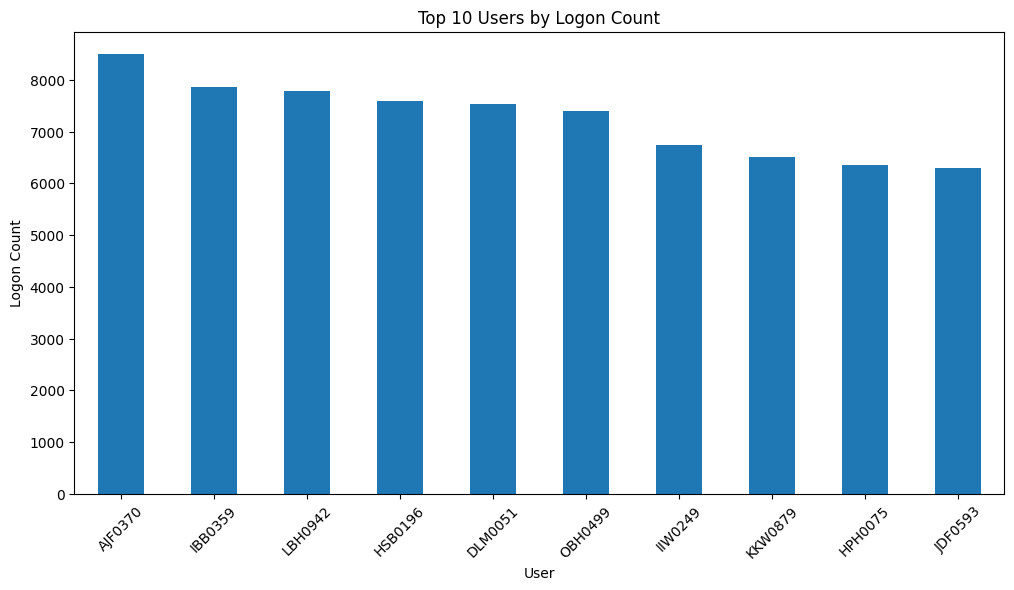

In [6]:
device_data['user'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Users by Logon Count')
plt.xlabel('User')
plt.ylabel('Logon Count')
plt.xticks(rotation=45)
plt.show()

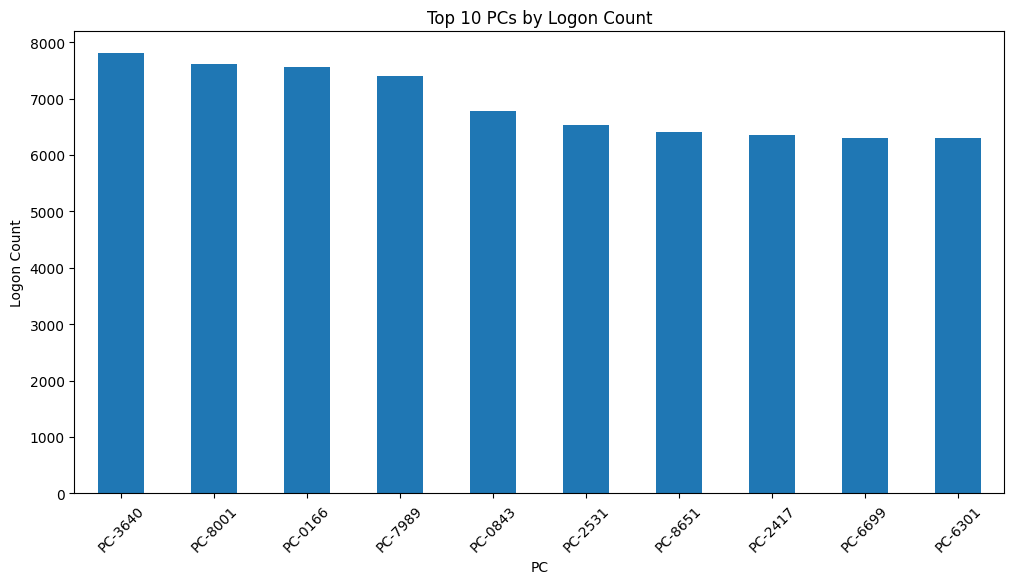

In [7]:
device_data['pc'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 PCs by Logon Count')
plt.xlabel('PC')
plt.ylabel('Logon Count')
plt.xticks(rotation=45)
plt.show()

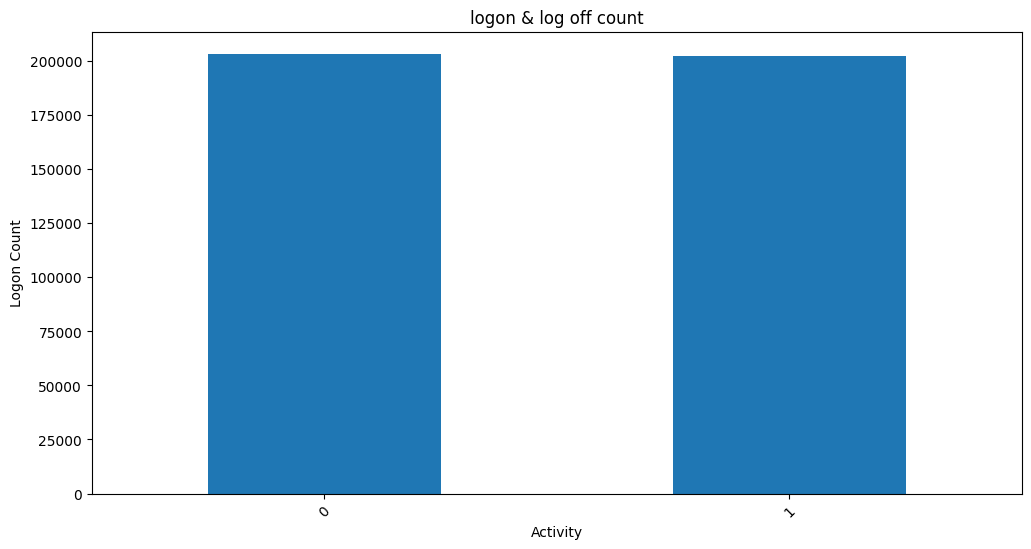

In [8]:
device_data['activity_disconnect'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('logon & log off count')
plt.xlabel('Activity')
plt.ylabel('Logon Count')
plt.xticks(rotation=45)
plt.show()

## check the time based pattern##

In [9]:
device_data['date'] = pd.to_datetime(device_data['date'], errors='coerce')
device_data['hour'] = device_data['date'].dt.hour
device_data['day_of_week'] = device_data['date'].dt.date

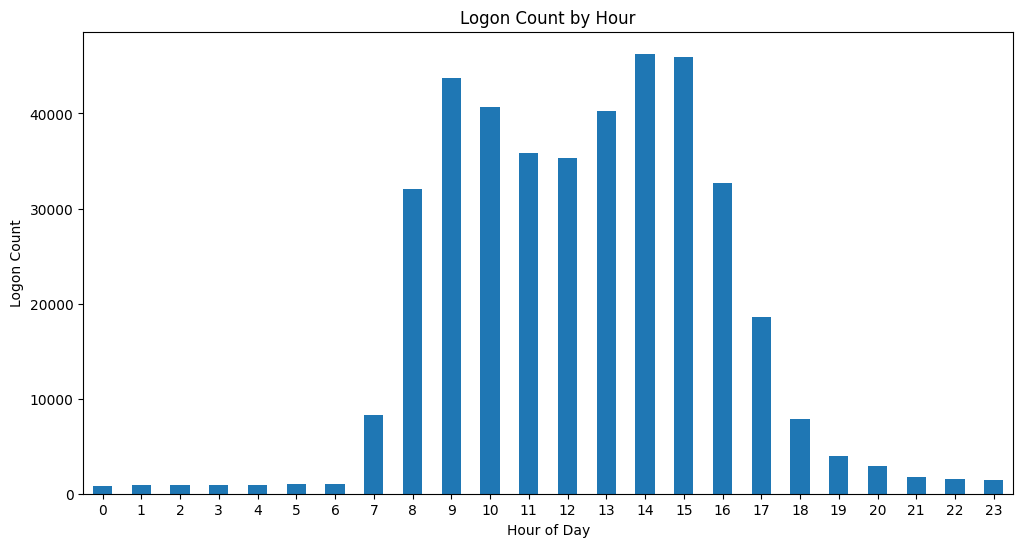

In [10]:
device_data['hour'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Logon Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Logon Count')
plt.xticks(rotation=0)
plt.show()

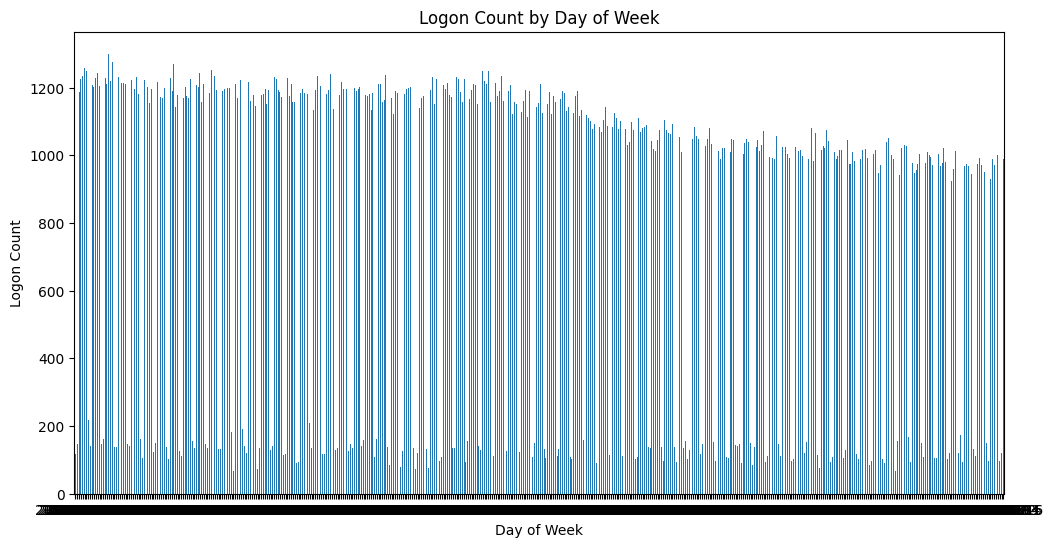

In [11]:
device_data['day_of_week'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Logon Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Logon Count')
plt.xticks(rotation=0)
plt.show()

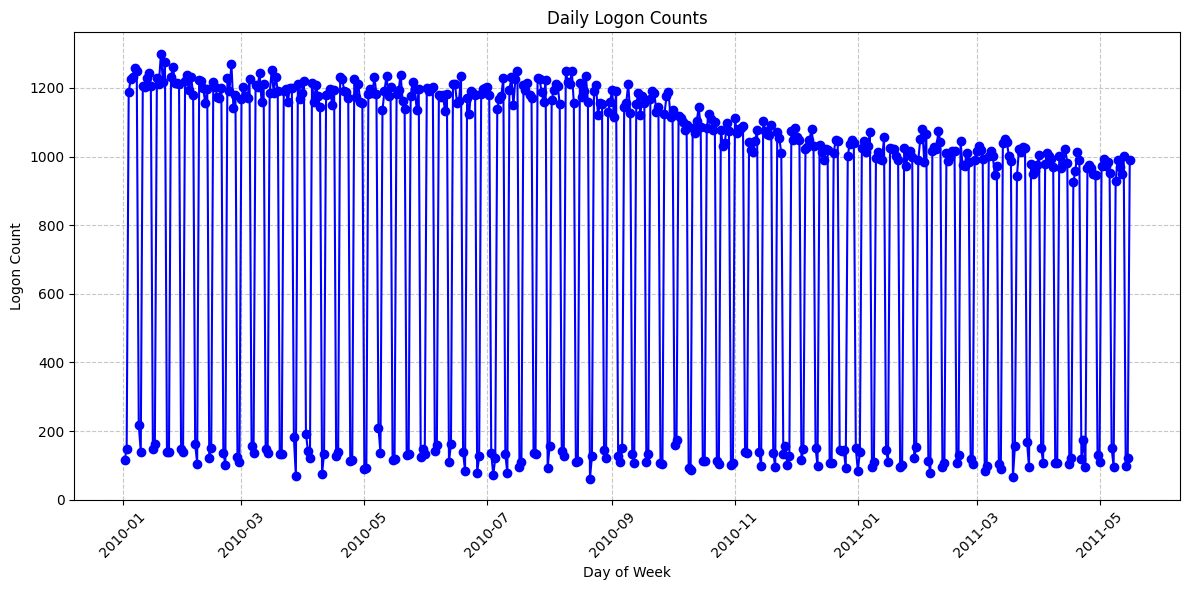

In [12]:
daily_logon_counts = device_data.groupby('day_of_week').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_logon_counts.index, daily_logon_counts.values, marker='o', linestyle='-', color='b')

plt.title('Daily Logon Counts')
plt.xlabel('Day of Week')
plt.ylabel('Logon Count')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
print("unique users:", device_data['user'].nunique())
print("unique PCs:", device_data['pc'].nunique())

unique users: 265
unique PCs: 971


## aggregation per user / per pc basis

In [15]:
logon_agg = device_data.groupby('user').agg(
    total_logons=('id', 'count'),
    unique_pcs=('pc', 'nunique'),
    first_seen=('date', 'min'),
    last_seen=('date', 'max'),
    active_days=('day_of_week', 'nunique'),
    offhour_logons=('hour', lambda x: (x < 8).sum() + (x > 17).sum()),
    weekend_logons=('day_of_week', lambda x: pd.Series(x).apply(lambda d: pd.to_datetime(d).weekday()>=5).sum())
    ).reset_index()

logon_agg.to_csv(r'D:\clean R4\logon_agg.csv', index=False)

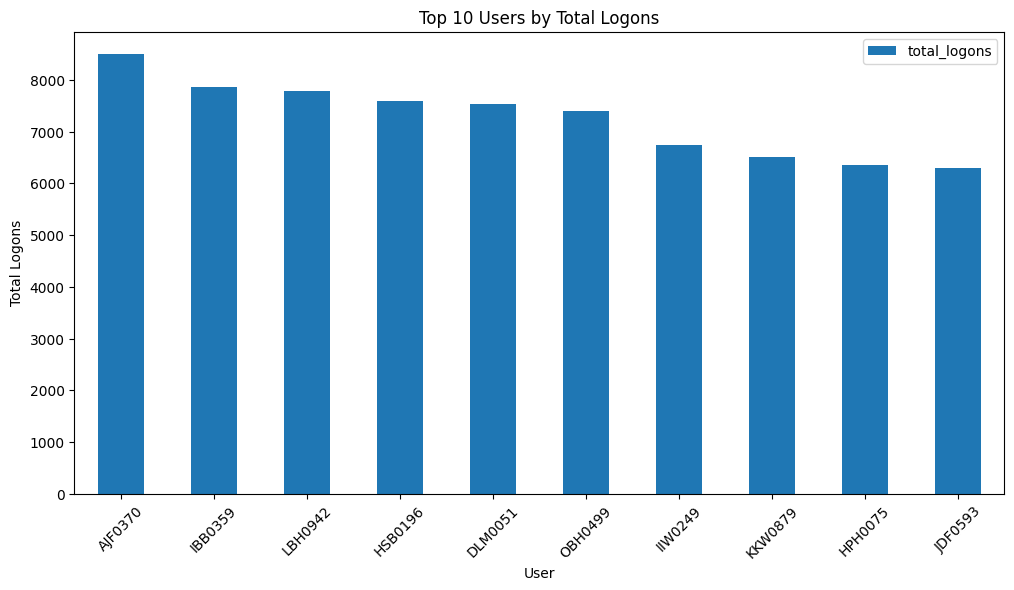

In [16]:
logon_agg.sort_values(by='total_logons', ascending=False).head(10).plot(kind='bar', x='user', y='total_logons', figsize=(12, 6))
plt.title('Top 10 Users by Total Logons') #finding the users with the most logons
plt.xlabel('User')
plt.ylabel('Total Logons')
plt.xticks(rotation=45)
plt.show()

In [18]:
pc_agg = device_data.groupby('pc').agg(
    total_logons=('id', 'count'),
    unique_users=('user', 'nunique'),
    first_seen=('date', 'min'),
    last_seen=('date', 'max'),
    active_days=('day_of_week', 'nunique')
).reset_index()

pc_agg.to_csv(r'D:\clean R4\pc_agg.csv', index=False)

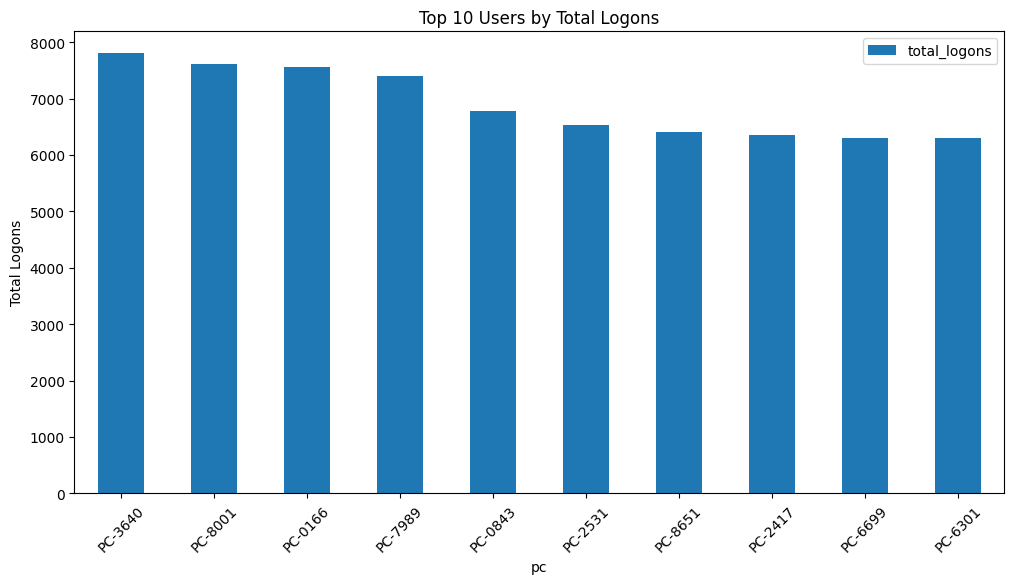

In [20]:
pc_agg.sort_values(by='total_logons', ascending=False).head(10).plot(kind='bar', x='pc', y='total_logons', figsize=(12, 6))
plt.title('Top 10 Users by Total Logons') #finding the users with the most logons
plt.xlabel('pc')
plt.ylabel('Total Logons')
plt.xticks(rotation=45)
plt.show()